In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [70]:
poke = pd.read_csv('Pokemon.csv')
poke = poke.loc[
    (poke['Type 1'] == 'Grass') | (poke['Type 1'] == 'Normal') | (poke['Type 1'] == 'Water') |
    (poke['Type 1'] == 'Bug') | (poke['Type 1'] == 'Psychic') | (poke['Type 1'] == 'Fire') |
    (poke['Type 1'] == 'Rock') | (poke['Type 1'] == 'Electric')
]
poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [71]:
from sklearn.preprocessing import StandardScaler

poke_features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
x = poke.loc[:, poke_features].values
y = poke.loc[:, ['Type 1']].values

x = StandardScaler().fit_transform(x)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDF = pd.DataFrame(data = principalComponents, 
                           columns = ['pc1', 'pc2'] )
principalDF.head()

,pc1,pc2
0,-1.721621,0.149953
1,-0.318745,0.127463
2,1.615567,0.113615
3,3.260663,0.887044
4,-1.950730,-0.597329


In [73]:
finalDF = pd.concat([principalDF, poke[['Type 1']]], axis = 1)
finalDF.head()

,pc1,pc2,Type 1
0,-1.721621,0.149953,Grass
1,-0.318745,0.127463,Grass
2,1.615567,0.113615,Grass
3,3.260663,0.887044,Grass
4,-1.950730,-0.597329,Fire


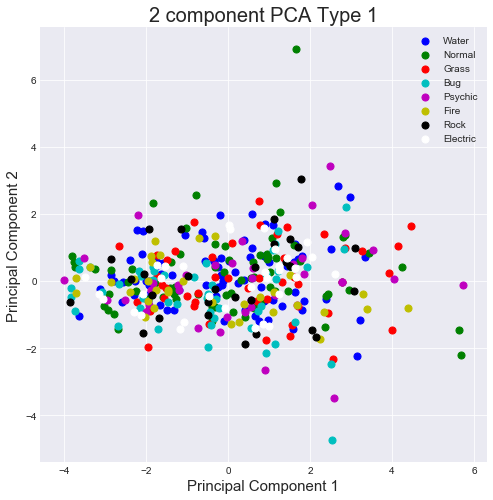

In [74]:
plt.style.use('seaborn-dark')
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA Type 1', fontsize = 20)

targets = ['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Rock', 'Electric']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['Type 1'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'pc1'],
              finalDF.loc[indicesToKeep, 'pc2'],
              c = color,
              s = 50)
ax.legend(targets)
ax.grid()

In [75]:
pca.explained_variance_ratio_

array([0.5232256 , 0.15562539])

In [76]:
poke = pd.read_csv('Pokemon.csv')

In [77]:
x = poke.loc[:, poke_features].values
y = poke.loc[:, ['Generation']].values

x = StandardScaler().fit_transform(x)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [78]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDF = pd.DataFrame(data = principalComponents, 
                           columns = ['pc1', 'pc2'] )
finalDF = pd.concat([principalDF, poke[['Generation']]], axis = 1)

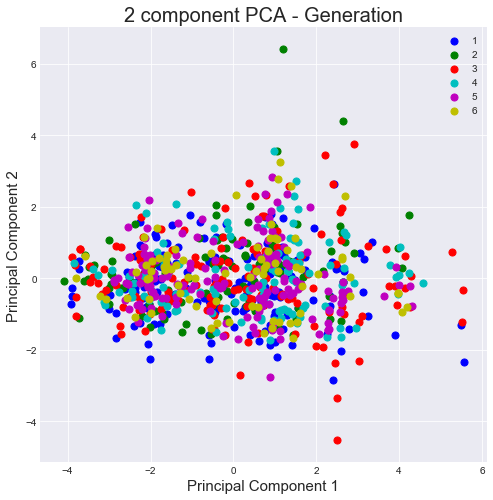

In [79]:
plt.style.use('seaborn-dark')
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA - Generation', fontsize = 20)

targets = [1, 2, 3, 4, 5, 6]
colors = ['b', 'g', 'r', 'c', 'm', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['Generation'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'pc1'],
              finalDF.loc[indicesToKeep, 'pc2'],
              c = color,
              s = 50)
ax.legend(targets)
ax.grid()